# Prediction of annotations on Human cells

## Install dependecies and PyMEGABASE

In [ ]:
import os
os.system('pip install -q glob2==0.7 requests pytest-shutil==1.7.0  pyBigWig==0.3.18 urllib3==1.26.14 tqdm==4.64.1 joblib==1.2.0 ipywidgets==8.0.4 biopython')
os.system('pip install pydca --no-deps')
os.system('pip install -i https://test.pypi.org/pypi/ --extra-index-url https://pypi.org/simple PyMEGABASE==1.0.13 --no-deps')


Here we chose ovary sample as the target cell 

Only using histone modification Chip-Seq data

In [2]:
import PyMEGABASE as PYMB

In [3]:
#Initialize PyMEGABASE 
pymb=PYMB.PyMEGABASE(cell_line='ovary', assembly='GRCh38', organism='human',
                    signal_type='signal p-value',ref_cell_line_path='training_cell_line',
                    histones=True,tf=True,small_rna=True,total_rna=True,n_states=10,res=50) 

    ****************************************************************************************    
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
    ****************************************************************************************    

              The PyMEGABASE class performs the prediction of genomic annotations               
              based on 1D data tracks of Chip-Seq and RNA-Seq. The input data is                
                                obtained from ENCODE data base.                                 
                          PyMEGABASE description is described in: TBD                           

        This package is the product of contributions from a number of people, including:        
                  Esteban Do

In [4]:
#Download data for the selected cell line from ENCODE
pymb.download_and_process_cell_line_data(nproc=4)

Number of replicas: 46


Process replicas: 100%|████████████████████████████████████████| 46/46 [06:06<00:00,  7.98s/it]


Experiments found in ENCODE for the selected cell line:
CTCF
EP300
H3K27ac
H3K27me3
H3K36me3
H3K4me1
H3K4me3
H3K9me3
POLR2A
minus-small-RNA-seq
minus-total-RNA-seq
plus-small-RNA-seq
plus-total-RNA-seq
Predictions would use:  13  experiments


In [5]:
#Download data for the reference cell line (GM12878) from ENCODE
pymb.download_and_process_ref_data(nproc=4)

Number of replicas: 125


Process replicas: 100%|████████████████████████████████████████| 125/125 [17:08<00:00,  8.23s/it]


Prediction will use:
CTCF
EP300
H3K27ac
H3K27me3
H3K36me3
H3K4me1
H3K4me3
H3K9me3
POLR2A
minus-small-RNA-seq
minus-total-RNA-seq
plus-small-RNA-seq
plus-total-RNA-seq


In [6]:
#Preprocess the downloaded data for tranining, filtering experiments with signal-to-noise ration different from GM12878-hg19 (training set)
pymb.training_set_up()

Not using EP300  to predict
Not using H3K27me3  to predict
Not using H3K36me3  to predict
Not using H3K9me3  to predict
Not using POLR2A  to predict
Number of suitable experiments for prediction: 8
To train the following experiments are used:
CTCF
H3K27ac
H3K4me1
H3K4me3
minus-small-RNA-seq
minus-total-RNA-seq
plus-small-RNA-seq
plus-total-RNA-seq


In [7]:
#Perform the training using the downloaded reference data
pymb.training(nproc=4,lambda_h=100,lambda_J=100)

Training started
Training finished
J and H produced


In [8]:
# Predict subcompartments and compartments for all the chromosomes
subcompartments,compartments=pymb.prediction_all_chrm(save_subcompartments=True,save_compartments=True)

Saving prediction in: ovary_GRCh38/predictions
Predicting subcompartments for chromosome:  1
Predicting subcompartments for chromosome:  2
Predicting subcompartments for chromosome:  3
Predicting subcompartments for chromosome:  4
Predicting subcompartments for chromosome:  5
Predicting subcompartments for chromosome:  6
Predicting subcompartments for chromosome:  7
Predicting subcompartments for chromosome:  8
Predicting subcompartments for chromosome:  9
Predicting subcompartments for chromosome:  10
Predicting subcompartments for chromosome:  11
Predicting subcompartments for chromosome:  12
Predicting subcompartments for chromosome:  13
Predicting subcompartments for chromosome:  14
Predicting subcompartments for chromosome:  15
Predicting subcompartments for chromosome:  16
Predicting subcompartments for chromosome:  17
Predicting subcompartments for chromosome:  18
Predicting subcompartments for chromosome:  19
Predicting subcompartments for chromosome:  20
Predicting subcompartm

<BarContainer object of 3 artists>

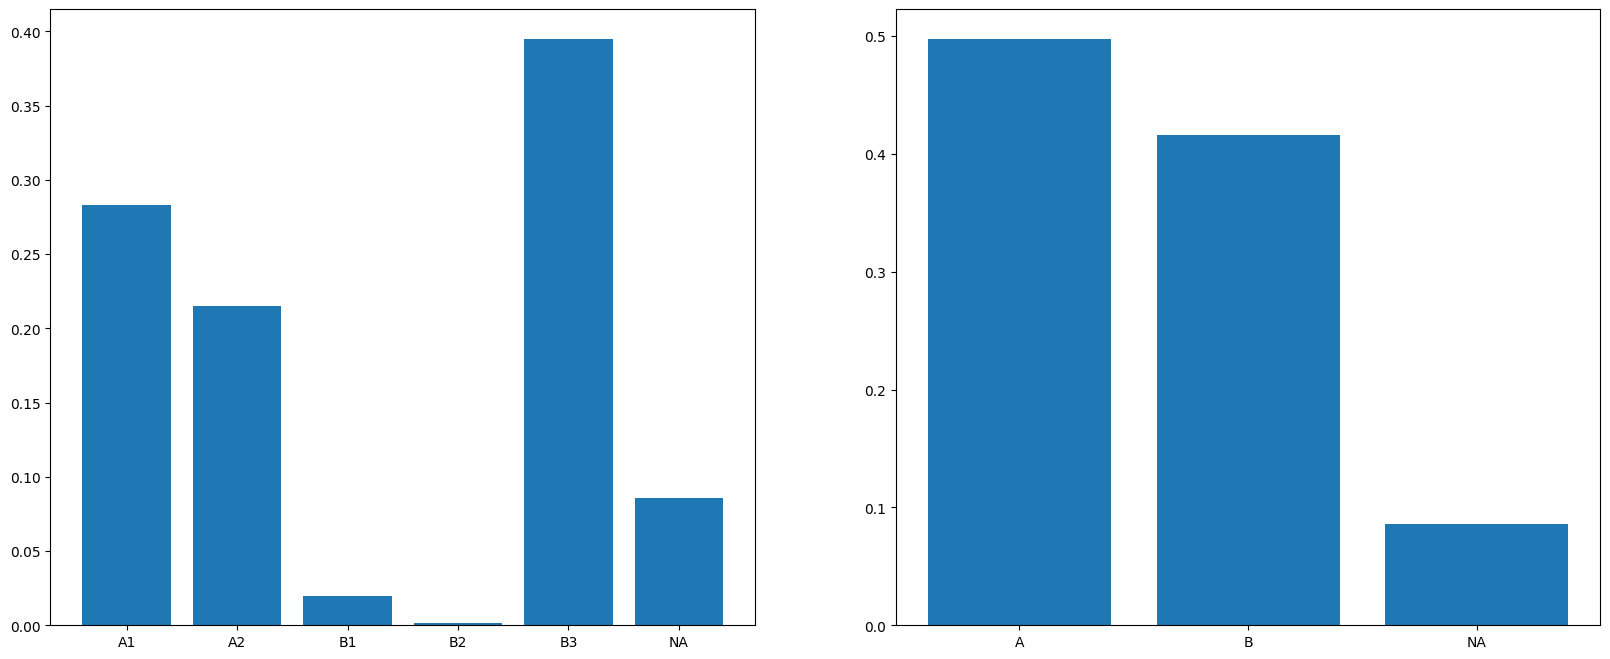

In [9]:
import matplotlib.pyplot as plt
import numpy as np

chr=1
fig, axs = plt.subplots(1, 2,figsize=(20,8))

#Check distribution of subcompartments
types_pyME=subcompartments[chr]
type_list, counts = np.unique(types_pyME,return_counts=True)
axs[0].bar(type_list,counts/len(types_pyME))

#Check distribution of compartments
types_pyME=compartments[chr]
type_list, counts = np.unique(types_pyME,return_counts=True)
axs[1].bar(type_list,counts/len(types_pyME))